In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
115,40,57000,0
22,48,41000,1
250,44,39000,0
248,41,52000,0
227,56,133000,1


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

#axis=1 => drop mentioned entire column
#axis=0 => by default
#agr hum axis nhi lenge, to ye error aega "KeyError: "labels ['Purchased'] not found in axis"
#Kyuki pandas samjhega ki hum 'Purchased' row ko drop karna chah rahe hai — but aisi koi row index nahi hai.

In [8]:
print(x_train.shape)
print(x_test.shape)

(280, 2)
(120, 2)


In [10]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(x_train) # Training data se mean/std nikaala
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test) # Test data ko same training ke scale se normalize kiya

# .fit() → Dataset ki mean aur standard deviation calculate karta hai.
# .transform() → Unhi calculated mean/std se data ko scale karta hai (normalize karta hai).

# To scaler test data ke mean/std calculate karega, jo ki model ke liye cheating jaisa ho jaata.
# Socho tumhari training data ki salary column ka mean = ₹50,000
# Aur test data ka mean = ₹1,00,000

# Agar scaler test data se mean lega, to test data pe alag scale lag jaayega → and model will get inconsistent results, and real-world performance degrade karega.

# Socho tum ek student ho:

# Training time pe tumhare paas sirf x_train data ka access tha

# Test exam ke time tum test questions ko dekh ke apna scale adjust kar loge to wo unfair ho gaya na?

# Model bhi test data ke kisi bhi info ko training time pe dekhna nahi chahiye
# Isi ko bolte hain:

# ❗ Data Leakage — jiska matlab hota hai: "test data ki information galti se training mein chali gayi"

In [11]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [12]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [13]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [16]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [17]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


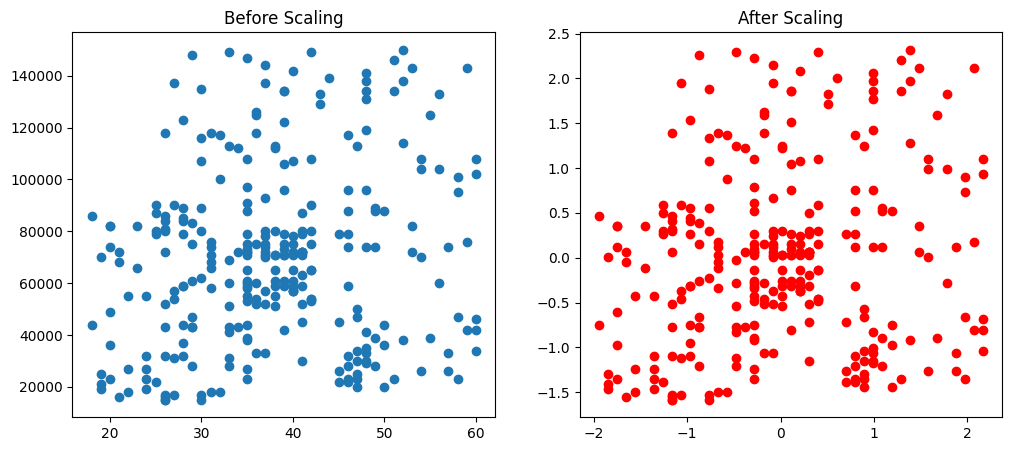

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()

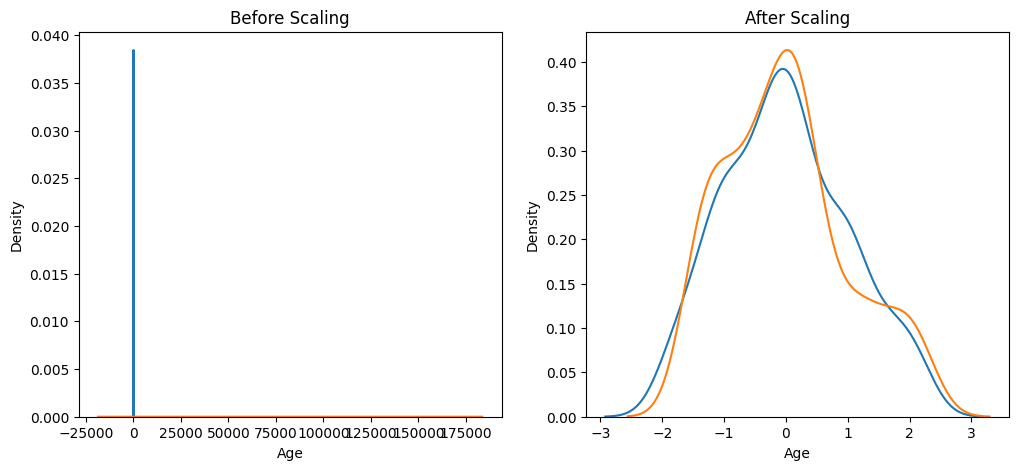

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()